In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [2]:
# Read in Revenue Files
file_2006 = "../../datasets/subsets/other_metrics/other_met_2006.csv"

other_2006 = pd.read_csv(file_2006)
other_2006 = other_2006.set_index(['STNAME'])
other_2006

,2006_E3A11,2006_E3A12,2006_E3A13,2006_E3A14,2006_E3A2,2006_E3A16,2006_E3A1,2006_E3B11,2006_E3B12,2006_E3B13,...,2006_X12D,2006_X12E,2006_X12F,2006_TX12,2006_NCE13,2006_ADA,2006_A14A,2006_A14B,2006_PPE15,2006_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,126356741,81266365,8118380,162492066,9676871.0,260700.0,378494252,NaN,NaN,NaN,...,19394445.0,4345018.0,NaN,486023763,5213052356,714197,NaN,714197.0,7299,741761
alaska,15705532,7350842,913835,20031065,561251.0,4417.0,44005691,611222.0,270905.0,3396951.0,...,968522.0,2203553.0,56318.0,65055242,1464589459,122010,122010.0,NaN,12004,133288
arizona,99740916,27658250,58099525,135850124,27090253.0,11294388.0,332643203,NaN,NaN,NaN,...,NaN,5179144.0,106660.0,491824242,6638517109,933663,933663.0,NaN,7110,1094454
arkansas,73678579,21122347,4870417,94319019,1974214.0,521713.0,194512075,NaN,NaN,990746.0,...,NaN,1252534.0,NaN,263712441,3544298515,435278,435278.0,NaN,8143,474206
california,664456147,257249864,57363403,947680068,13233012.0,190043.0,1926939525,55774762.0,23094421.0,21872603.0,...,396473108.0,4645501.0,24435445.0,2837333403,50598769405,6349270,6349270.0,NaN,7969,6437202
colorado,67753355,17485941,13398444,97679273,5090170.0,742111.0,197059124,9790236.0,1974259.0,1762612.0,...,1165847.0,3092691.0,94625.0,452562980,5915726309,712476,712476.0,NaN,8303,779826
connecticut,67615582,29636235,16094795,87666363,4259706.0,1990379.0,203003354,39344062.0,8834483.0,9003086.0,...,25904690.0,1070757.0,929788.0,249752589,7267272365,558423,NaN,558423.0,13014,575059
delaware,24102092,6638976,3282973,31035418,1554476.0,854007.0,65913466,NaN,NaN,NaN,...,13582720.0,770387.0,753139.0,52288945,1353176310,113986,NaN,113986.0,11871,120937
district of columbia,10197148,2344845,1481545,12093228,NaN,NaN,26116766,NaN,NaN,NaN,...,11250734.0,928453.0,433321.0,86388095,970777667,59137,59137.0,NaN,16416,76876


In [3]:
(other_2006.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      73.481666
new york        50.982438
texas           48.170986
florida         29.871746
pennsylvania    26.537511
dtype: float64

In [4]:
summary_2006 = pd.DataFrame(other_2006.sum(axis=1)/100000000, columns=['Total OtherEx ($100M)'])
summary_2006['NoninstructionalEx ($100M)'] = other_2006.iloc[:,0:14].sum(axis=1)/100000000
summary_2006['CurrentEx ($100M)'] = other_2006.iloc[:,14:15].sum(axis=1)/100000000
summary_2006['Per PupilEx ($)'] = other_2006.iloc[:,44:45].sum(axis=1)


summary_2006

,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($)
STNAME,,,,
alabama,77.203489,7.666654,0.0,7299
alaska,19.881157,1.023370,0.0,12004
arizona,96.334392,6.923767,0.0,7110
arkansas,49.447034,3.969033,0.0,8143
california,734.816664,40.881916,0.0,7969
colorado,85.618972,4.322548,0.0,8303
connecticut,97.997724,5.376597,0.0,13014
delaware,18.975028,1.333814,0.0,11871
district of columbia,13.043461,0.522335,0.0,16416


In [5]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2006.csv"

success_2006 = pd.read_csv(dropout_path)
success_2006

,STNAME,2006_DRP912,2006_DRP9,2006_DRP10,2006_DRP11,2006_DRP12,2006_DRPAM,2006_DRPAS,2006_DRPHI,2006_DRPBL,2006_DRPWH
0,alabama,2.5,1.9,2.6,2.8,2.9,1.3,1.2,2.9,2.9,2.3
1,alaska,8.0,4.8,7.5,8.9,11.3,11.7,6.9,9.7,10.0,6.2
2,arizona,7.6,4.9,6.0,8.0,13.0,NaN,4.4,9.3,8.1,NaN
3,arkansas,3.1,1.8,3.0,4.1,3.9,2.5,2.4,3.8,4.2,2.7
4,california,3.7,2.3,2.3,3.0,8.1,4.4,1.8,4.8,6.5,2.3
5,colorado,7.8,5.7,7.4,8.5,10.1,13.5,4.8,15.8,12.5,4.7
6,connecticut,2.0,1.9,1.9,2.3,1.9,2.3,0.7,4.6,2.8,1.3
7,delaware,5.5,6.5,5.7,5.3,4.0,6.8,2.9,9.8,7.3,4.2
8,district of columbia,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN,4.0
9,florida,4.1,3.7,3.7,4.2,4.9,3.7,1.7,5.0,5.8,2.9


In [6]:
summary_2006['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_2006['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    
summary_2006

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($),Dropout Rate
STNAME,,,,,
alabama,77.203489,7.666654,0.0,7299,2.5
alaska,19.881157,1.023370,0.0,12004,8
arizona,96.334392,6.923767,0.0,7110,7.6
arkansas,49.447034,3.969033,0.0,8143,3.1
california,734.816664,40.881916,0.0,7969,3.7
colorado,85.618972,4.322548,0.0,8303,7.8
connecticut,97.997724,5.376597,0.0,13014,2
delaware,18.975028,1.333814,0.0,11871,5.5
district of columbia,13.043461,0.522335,0.0,16416,NaN


In [7]:
summary_2006['Dropout Rate'] = ''

for i in range(len(success_2006)):
    summary_2006['Dropout Rate'][i] = success_2006['2006_DRP912'][i].astype(float)
    

summary_2006 = summary_2006[summary_2006['Dropout Rate'].notna()]
summary_2006['Dropout Rate'] = summary_2006['Dropout Rate'].astype(float)
summary_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total OtherEx ($100M)       47 non-null     float64
 1   NoninstructionalEx ($100M)  47 non-null     float64
 2   CurrentEx ($100M)           47 non-null     float64
 3   Per PupilEx ($)             47 non-null     int64  
 4   Dropout Rate                47 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.2+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


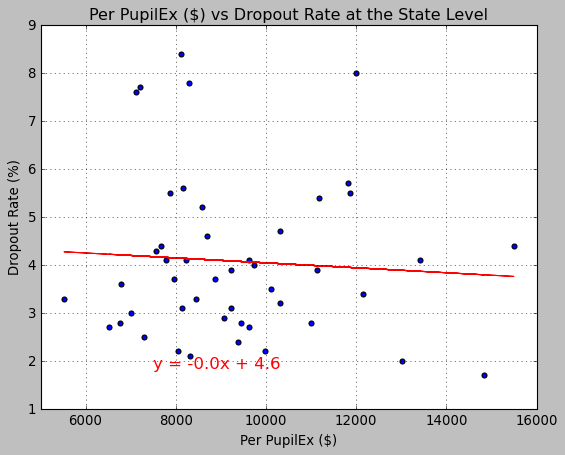

The correlation between both factors is -0.0667


In [12]:
# Total Support vs Dropout Rate
x_values = summary_2006['Per PupilEx ($)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

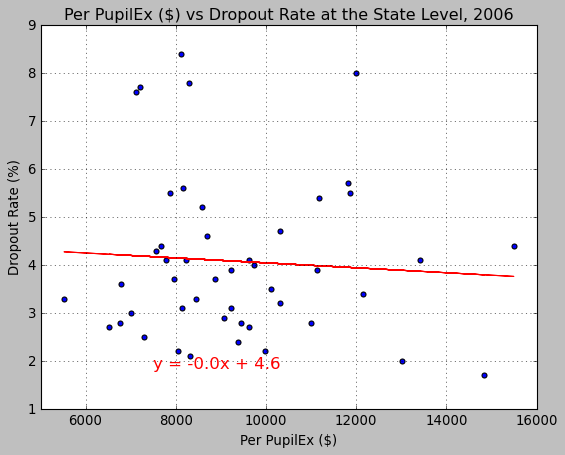

The correlation between both factors is -0.0667


In [13]:
# Total Support vs Dropout Rate
x_values = summary_2006['Per PupilEx ($)']
y_values = summary_2006['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level, 2006')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [10]:
# Load in Dropout Rates
dropout_path_2006 = "../../datasets/subsets/success/success_df_2006.csv"
dropout_path_2007 = "../../datasets/subsets/success/success_df_2007.csv"
dropout_path_2008 = "../../datasets/subsets/success/success_df_2008.csv"
dropout_path_2009 = "../../datasets/subsets/success/success_df_2009.csv"
dropout_path_2010 = "../../datasets/subsets/success/success_df_2010.csv"


success_2006 = pd.read_csv(dropout_path_2006)
success_2007 = pd.read_csv(dropout_path_2007)
success_2008 = pd.read_csv(dropout_path_2008)
success_2009 = pd.read_csv(dropout_path_2009)
success_2010 = pd.read_csv(dropout_path_2010)

dropout_df = pd.DataFrame(summary_2006.index)
dropout_df['2006'] = success_2006['2006_DRP912']
dropout_df['2007'] = success_2007['2007_DRP912']
dropout_df['2008'] = success_2008['2008_DRP912']
dropout_df['2009'] = success_2009['2009_DRP912']
dropout_df['2010'] = success_2010['2010_DRP912']
dropout_df['Total Change'] = dropout_df['2010'] - dropout_df['2006']
dropout_df.sort_values(by=['Total Change'], ascending = False)

,STNAME,2006,2007,2008,2009,2010,Total Change
24,missouri,3.0,4.299999,4.599998,4.199997,7.399998,4.399998
31,new york,5.5,6.099998,5.199997,4.899998,6.899998,1.399998
15,kansas,2.2,2.299999,2.900000,3.099998,3.400000,1.200000
6,connecticut,2.0,2.099998,2.799999,3.099998,3.000000,1.000000
4,california,3.7,5.500000,5.000000,5.000000,4.599998,0.899998
22,minnesota,3.5,7.399998,6.199997,3.799999,4.299999,0.799999
26,nebraska,3.7,3.699999,5.199997,5.000000,4.299999,0.599999
39,tennessee,4.1,5.799999,5.299999,4.399998,4.599998,0.499998
3,arkansas,3.1,4.599998,4.699997,4.099998,3.599998,0.499998
11,idaho,4.7,5.399998,5.399998,4.899998,5.199997,0.499997


Text(0, 0.5, 'Dropout Rate (%)')

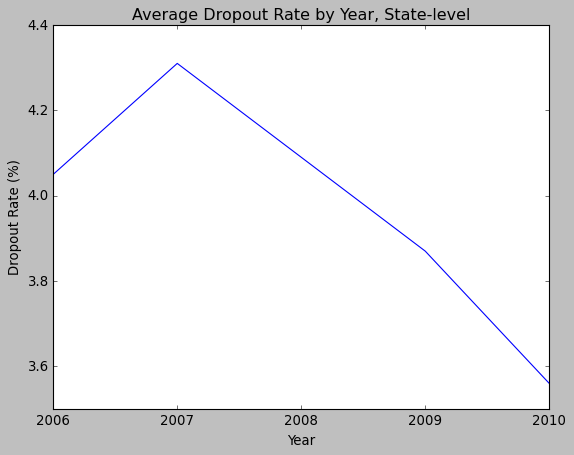

In [11]:
avg_2006 = np.round(dropout_df['2006'].mean(), decimals = 2)
avg_2007 = np.round(dropout_df['2007'].mean(), decimals = 2)
avg_2008 = np.round(dropout_df['2008'].mean(), decimals = 2)
avg_2009 = np.round(dropout_df['2009'].mean(), decimals = 2)
avg_2010 = np.round(dropout_df['2010'].mean(), decimals = 2)

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [avg_2006, avg_2007, avg_2008, avg_2009, avg_2010])
plt.title("Average Dropout Rate by Year, State-level")
plt.xlabel("Year")
plt.ylabel("Dropout Rate (%)")
